                                                                                                                        © Moon

# Project Report: Evaluation of the Centrality Algorithm, PageRank
***

## Introduction

Centrality algorithms are one of the categories of graph algorithms. They identify the important nodes in a given graph and those nodes are defined as vertices with many direct or indirect connections.  One of the centrality algorithms is called $PageRank(PR)$ which identify most important vertices of a graph by measuring the direct influence of nodes based on proportional rank. [1]PR is invented by Larray Page and used by Google Search to rank web pages in their search engine results.

This notebook demonstrates:
- The PageRank algorithm
- Implementation the Classic PageRank algorithm and explore it on graphs generated from Networks, python library.
- Measuring time complexity theoretically
- Measuring time complexity empirically

***

## Simplified PageRank

[2]PageRank is a link analysis algorithm and it assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The output of PR is the probability that a person randomly surfing will arrive arrive at any particular page. It is assumed that the input distribution is evenly divided at the beginning of PR process. 

PR takes three inputs; $number of pages$, damping factor, and a number of iterations. The PageRank relies on an arbitrary probability distribution in which a person randomly clicks on links will arrive at any particular page. The probability which a person independently will continue is a damping factor $d$. PR computations require iterations through a number of pages to adjust approximate PR values to the theoretical value.

[1]The result of node with a PR of 0.4 for instance, means there is 40% chance that a person randomly surf will be directed to the node. The implementation of the classic PageRank algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed.

### PageRank Formula

[6]let G = (V, E) be a directed graph with the set of vertices V and et of edges E, where E is subset of V x V. <br>
For a given Vi, let In(Vi) be predecessors, set of vertices point to it, and let Out(Vi) be successors, the set of vertices that vertex Vi points to. Then The iteration equation of the page rank value of  𝑖  is given by

PR(Vi) = (1 - d) + d * $\sum_{j=In(Vi)}^{} 1/|Out(Vj)|$ PR(Vj)
 <br>
       => (1-d)/N + d*(PR(n1)/num_neighbors(n1) + ... + PR(n_last)/num_neighbors(n_last))**

where 
- the damping factor $d$
- $\frac{d}{n}$ denotes random walk score
- $OutputDegree(P_j)$ denote how many pages are linked as children pages for the page $j$.

## Assumption

In the early PageRank, there limitations:
- [5]Rank Sinks: A rank sink occurs when a page does not link out. Rank sinks occurs when by refusing to share. 

- [5]Hoarding: a group of pages that only link between each other will also monopolize PageRank, creating error. 

- [5]Circular references: A couple of pages that only link between themselves and do not link to any other page. The iterative process will never converge, creating infinity loop.

Therefore, in this study, we will make a set of simplifying assumptions:
- we will be using only directed graphs generated from NetworkX library. 
- the generated graph has unweighted nodes; error rate is close to 0 when number of iterations > 5
- damping factor does not affect the rate of convergence


### Algorithm Steps
The implementation of the classic PageRank algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed.

1. Initialize the PageRank of every node with a value of 1/n
2. Iterate through the graph. For each iteration, update the PageRank of every node in the graph.
   1. For the first page, it only processes through random walk. 
   2. For other pages, they can process through random walk or inter-page links. 
   3. Sum up the proportional rank from all of its in-neighbors
   4. Update the PageRank with the weighted sum of proportional rank and random walk
3. Normalize the PageRank when there is terminal point. PageRank value will converge after enough iterations
5. Return PR scores

***

## Canonical Test 

In [ ]:
# import nx packages
import networkx as nx

num_nodes = [5, 10, 15, 30, 50, 100]

def node_f(n):
    # Create a scale-free graph on given number of nodes
    return nx.scale_free_graph(n)



# The Algorithm Script

| **Input Argument** | **Type** | **Comment**                                       | 
|--------------------|----------|---------------------------------------------------|
| G                  | graph    | input graph; will be converted to number of nodes |
| n                  | int      | total number of nodes of given graph (G)          |     
| d                  | float    | damping factor; the probability of random walk                                    |
| I                  | int    | the number of iteration                       |

| **Output Argument** | **Type** | **Comment**                                                           |
|---------------------|----------|-----------------------------------------------------------------------|
| PR                  | array    | node property where the PageRank value for each node will be written. |


In [ ]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import random
from time import perf_counter

def pageRank(G, d = 0.85, I = 100):
    # converts input graph into number of nodes
    n = nx.number_of_nodes(G)           # O(n) - traverse every nodes to count total number of nodes 
    
    # Step 1: Initialize the PageRank of every node with a value of 1/n | O(n)
    PR = np.ones(n)/n               # O(1) computation

    # Step 2: For each iteration, update the PageRank of every node in the graph.
    for i_t in range(I):                                                # O(I) where I is number of iteration
        
    # 2-1: For the first page, it only processes through random walk. 
        rand = 1 / n                                                    # O(1) - assign value & computation
        PR[0] = d * rand                                                # O(1) - assign value & computation

        #  2-2: For other pages, they can process through random walk or inter-page links.
        for i in range(1, n):                                           # O(n) where n is number of pages
            
            # 2 - 3: Sum up the proportional rank from all of its in-neighbors 
            i_prop = PR[i-1] / 1                                        # O(1) - assign value & computation
            # 2 - 4: Update the PageRank with the weighted sum of proportional rank and random walk
            PR[i] = d * rand + (1-d) * i_prop                           # O(1) - update variable & computation

# Step 3: normalize PR when there is terminal point
    PR /= PR.sum()                                                      # O(1) - computation
    return PR                                                           # O(1) - returning value


'\nReferences\n----------\n[1]“Networkx.algorithms.link_analysis.pagerank_alg — NetworkX 2.8.5 Documentation.” \nNetworkx.org, 2022, networkx.org/documentation/stable/_modules/networkx/algorithms/link_analysis/pagerank_alg.html#pagerank. \nAccessed 24 July 2022.\n'

***

## Theoretical Analysis

Refer to the simplified PR algorithm and the script in the previous cells. <br>
The implementation of above PR algorithm uses an iterative method. At each iteration step, the PageRank value of all nodes in the graph are computed. <br>

The time complexity depends on I, number of iterations and N, total number of nodes.

The main loop runs I times, which is total number of iteration. <br>
The inner loo p runs n times, which is the number of nodes generated <br>
<br>

The time complexity’s value is O(I * N) where I represents the specific number of iterations that needs to be run on node N. 
The space complexity’s value is O(N) where n is total number of nodes. since we keep only the given nodes information. 

# Empirical Time Complexity

The empirical time analysis function takes number of nodes, pageRank function, and graph generation function.

The PR score is returned as an array and can be iterable so its value can be 1 or more depending on the input sizes. For example a tree node would be a value only but a hash would require key and value. Inner loop runs 10 times to reduce the variation of the measurement for statistical purposes.

We will use the time.perf_counter to measure time and use a log scale plot to show very small variations at a detailed level.

In [ ]:
from time import perf_counter
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# def node_f(n):
#     return nx.scale_free_graph(n) # Create a scale-free graph on given number of nodes

# Page Rank returns array of output; page Rank takes in graphs; therefore, graphs should be generated and 
# input: number of nodes of PR time

def measure_cost(num_nodes, pageRank, node_f):
    t = []
    PR = None
    for n in num_nodes:
        runs = []
        st = perf_counter()
        for i in range(n):
            G = node_f(i)
            PR = pageRank(G)
            
            runs += [perf_counter()-st]
        t += [np.mean(runs)]

    print('clock: ', ' '.join(['{:g}'.format(v) for v in t]))
    # PR dataset can be used for search
    return t, PR

'''
[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>
'''

'\nReferences\n----------\n[1]module05_05.reivew_of_Data_Structures — Foundation of Algo Documentation.” \nGuven, 2022,\nAccessed 24 July 2022.\n'

In [ ]:
num_nodes = [5, 10, 15, 30, 50, 100]

t1, ds1 = measure_cost(num_nodes, pageRank, node_f)


'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''

clock:  0.000257199 0.00171029 0.00479753 0.0102145 0.0436353 0.236668 0.391075


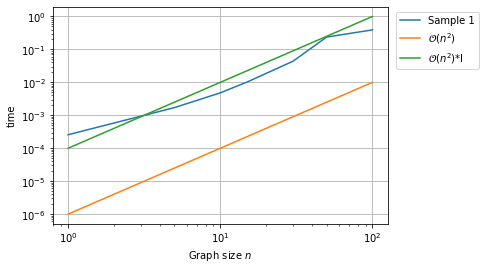

In [ ]:
# Plot
df = pd.DataFrame({'Graph size $n$':  num_nodes,
                   'PageRank':        t1,
                   '$\mathcal{O}(n^2)$*I':     [100 * 1e-6*n**2 for n in num_nodes],
                   '$\mathcal{O}(n^2)$':     [1e-6*n**2 for n in num_nodes],
                   })

df.set_index('Graph size $n$', drop=True, inplace=True)

fig = df.plot().get_figure()

plt.legend(bbox_to_anchor=(1.01, 1.0))

plt.ylabel('time')
plt.grid()
plt.xscale('log')
plt.yscale('log')

fig.savefig('page_Rank_01.png')
'''
References
----------
[5]E. Guven, module05_ds, Jhu.edu. (2022).
https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).
'''


***

# Conclusion

The importance of a Web page is subjective which depends on users interests and backgrounds. However, using PR algorithm, it can measrures relative importance of Webpages.
In this study, we briefly demonstrated about PageRank algorithm and its theoretical and empirical complexity. PageRank algorithms are important members of centrality algorithms which identify most important vertices of a graph by measuring the direct influence of nodes based on proportional rank.

We examined the simplified PageRank algorithm. We empirically showed that the algorithm can run in O(N^2 * I) time where N represents total number of nodes given graph and I represents iterations.


***

## References

[1]Wikipedia Contributors, PageRank, Wikipedia. (2022).<br> https://en.wikipedia.org/wiki/PageRank (accessed July 24, 2022).<br>
<br>
[2]Graph generators — NetworkX 2.8.5 documentation, Networkx.org. (2019).<br> https://networkx.org/documentation/stable/reference/generators.html (accessed July 24, 2022).<br>
<br>
[3]pagerank — NetworkX 2.8.5 documentation, Networkx.org. (2022).<br> https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html (accessed July 24, 2022).<br>
<br>
[4]L. Page, S. Brin, R. Motwani, T. Winograd, The PageRank Citation Ranking: Bringing Order to the Web. - Stanford InfoLab Publication Server, Stanford.edu. (1999).<br> https://doi.org/http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf.<br>
<br>
[5]E. Guven, module05_ds, Jhu.edu. (2022).<br> https://jhu.instructure.com/courses/13110/pages/module-5-readings?module_item_id=1077894 (accessed July 24, 2022).<br>

[6]R. Mihalcea, P. Tarau, TextRank: Bringing Order into Texts, n.d.<br> https://digital.library.unt.edu/ark:/67531/metadc30962/m2/1/high_res_d/Mihalcea-2004-TextRank-Bringing_Order_into_Texts.pdf.

***
***